# import dependencies

In [44]:
import sys, re
sys.path.append("../code-python3")
import csv

import matplotlib.pyplot as plt
from collections import Counter
import math, random, csv, json, re

from bs4 import BeautifulSoup
import requests
from dateutil.parser import parse

from twython import TwythonStreamer

# Reading Files

In [2]:
file_for_reading = open('../code-python3/stocks.txt', 'r')

In [4]:
file_for_reading.close()

In [10]:
start_with_hash = 0
with open('../code-python3/stocks.txt', 'r') as f:
    for line in f:
        if re.search("26.9", line):
            start_with_hash += 1

print(start_with_hash)

20


# Delimited Files

In [2]:
def process(date, symbol, price):
    print(date, symbol, price)

print("tab delimited stock prices:")

with open('../code-python3/tab_delimited_stock_prices.txt', 'r', encoding='utf8',newline='') as f:
    reader = csv.reader(f, delimiter='\t')
    # reader = csv.reader(codecs.iterdecode(f, 'utf-8'), delimiter='\t')
    for row in reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)

print()

print("colon delimited stock prices:")

with open('../code-python3/colon_delimited_stock_prices.txt', 'r', encoding='utf8',newline='') as f:
    reader = csv.DictReader(f, delimiter=':')
    # reader = csv.DictReader(codecs.iterdecode(f, 'utf-8'), delimiter=':')
    for row in reader:
        date = row["date"]
        symbol = row["symbol"]
        closing_price = float(row["closing_price"])
        process(date, symbol, closing_price)

print()

print("writing out comma_delimited_stock_prices.txt")

today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

with open('../code-python3/comma_delimited_stock_prices.txt','w', encoding='utf8',newline='') as f:
    writer = csv.writer(f, delimiter=',')
    for stock, price in today_prices.items():
        writer.writerow([stock, price])



tab delimited stock prices:
6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5
6/19/2014 AAPL 91.86
6/19/2014 MSFT 41.51
6/19/2014 FB 64.34

colon delimited stock prices:
6/20/2014 AAPL 90.91
6/20/2014 MSFT 41.68
6/20/2014 FB 64.5

writing out comma_delimited_stock_prices.txt


# Scraping the Web

In [15]:

# there is AJAX call to perform the actual search for the book,
# so the BeautifulSoup cannot get any book info.

print("BeautifulSoup")
html = requests.get("http://shop.oreilly.com/category/browse-subjects/" + \
           "data.do?sortby=publicationDate&page=1").text
soup = BeautifulSoup(html)
print(soup)
print()

BeautifulSoup
<!--[if IE]><![endif]--><!DOCTYPE html>
<!--[if lt IE 9]><meta http-equiv="refresh" content="0; url=/unsupported-browser/" /><![endif]--><!--[if lt IE 10]><html class="no-js ie8 oldie" lang="en" prefix="og: http://ogp.me/ns/# og:book: http://ogp.me/ns/book# og:video: http://ogp.me/ns/video#" data-login-url="/accounts/login/"
data-offline-url="/"
data-url="/search/"
data-csrf-cookie="csrfsafari"
data-highlight-privacy="" data-debug=0 data-testing=0><![endif]--><!--[if gt IE 9]><!--><html class="no-js" data-csrf-cookie="csrfsafari" data-debug="0" data-highlight-privacy="" data-login-url="/accounts/login/" data-offline-url="/" data-testing="0" data-url="/search/" lang="en" prefix="og: http://ogp.me/ns/# og:book: http://ogp.me/ns/book# og:video: http://ogp.me/ns/video#"><!--<![endif]--><head><title>Search for : Safari</title><meta content="Search for : Safari" name="description"/><link href="https://www.oreilly.com/favicon.ico" rel="shortcut icon"/><meta charset="utf-8"/><met

# Books about Data

('souping page', 0)
('souping page', 1)
('souping page', 2)
('souping page', 3)
('souping page', 4)
('souping page', 5)
('souping page', 6)
('souping page', 7)
('souping page', 8)
('souping page', 9)
('souping page', 10)
('souping page', 11)
('souping page', 12)
('souping page', 13)
('souping page', 14)
('souping page', 15)
('souping page', 16)
('souping page', 17)
('souping page', 18)
('souping page', 19)
('souping page', 20)
('souping page', 21)
('souping page', 22)
('souping page', 23)
('souping page', 24)
('souping page', 25)
('souping page', 26)
('souping page', 27)
('souping page', 28)
('souping page', 29)
('souping page', 30)


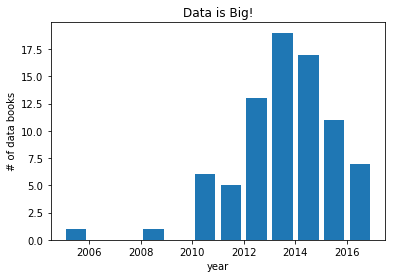

In [37]:
######
#
# BOOKS ABOUT DATA
#
######

def is_video(result):
    """it's a video if it has exactly one pricelabel, and if
    the stripped text inside that pricelabel starts with 'Video'"""
    return (result['format'] == 'video')

def book_info(result):
    title = result['title']
    authors = result['authors']
    isbn = result.get('isbn')
    date = result['issued']

    return {
        "title" : title,
        "authors" : authors,
        "isbn" : isbn,
        "date" : date
    }

from time import sleep

def scrape(num_pages=31):
    
    books = []
    for page_num in range(0, num_pages):
        response = requests.post('https://www.safaribooksonline.com/api/v2/search/', data = {'query':'data', 'page': page_num})
        print("souping page", page_num)
        
        # print("response.text", response.text)
        
        booksjson = json.loads(response.text)
        results = booksjson['results']
        
        for result in results:
            if not is_video(result):
                books.append(book_info(result))
        
        if (page_num + 1 != num_pages):
            sleep(5)
        

    return books

def get_year(book):
    return int(parse(book["date"]).year)

def plot_years(plt, books):
    # 2014 is the last complete year of data (when I ran this)
    year_counts = Counter(get_year(book) for book in books)

    years = sorted(year_counts)
    book_counts = [year_counts[year] for year in years]
    plt.bar([x - 0.5 for x in years], book_counts)
    plt.xlabel("year")
    plt.ylabel("# of data books")
    plt.title("Data is Big!")
    plt.show()

    

books = scrape(num_pages=31)
books
plot_years(plt, books)

In [38]:

print("parsing json")

serialized = """{ "title" : "Data Science Book",
                  "author" : "Joel Grus",
                  "publicationYear" : 2014,
                  "topics" : [ "data", "science", "data science"] }"""


# parse the JSON to create a Python object
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
    print(deserialized)

print()

parsing json
{u'publicationYear': 2014, u'author': u'Joel Grus', u'topics': [u'data', u'science', u'data science'], u'title': u'Data Science Book'}
()


# Using an Unauthenticated API

In [41]:
##
#
# APIs
#
##

endpoint = "https://api.github.com/users/almandsky/repos"

repos = json.loads(requests.get(endpoint).text)


dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

print("GitHub API")
print("dates", dates)
print("month_counts", month_counts)
print("weekday_count", weekday_counts)

last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]

print("last five languages", [repo["language"]
                              for repo in last_5_repositories])

GitHub API
('dates', [datetime.datetime(2017, 8, 2, 5, 58, 24, tzinfo=tzutc()), datetime.datetime(2016, 11, 4, 6, 53, 36, tzinfo=tzutc()), datetime.datetime(2016, 2, 19, 21, 50, 8, tzinfo=tzutc()), datetime.datetime(2017, 6, 4, 7, 25, 58, tzinfo=tzutc()), datetime.datetime(2017, 11, 11, 4, 40, 56, tzinfo=tzutc()), datetime.datetime(2016, 11, 17, 8, 51, 47, tzinfo=tzutc()), datetime.datetime(2016, 9, 28, 0, 27, 56, tzinfo=tzutc()), datetime.datetime(2017, 8, 25, 18, 41, 22, tzinfo=tzutc()), datetime.datetime(2016, 9, 12, 20, 38, 40, tzinfo=tzutc()), datetime.datetime(2017, 8, 18, 17, 12, 36, tzinfo=tzutc()), datetime.datetime(2016, 9, 21, 17, 39, 9, tzinfo=tzutc()), datetime.datetime(2016, 7, 16, 9, 52, 9, tzinfo=tzutc()), datetime.datetime(2014, 3, 29, 8, 32, 49, tzinfo=tzutc()), datetime.datetime(2016, 6, 29, 6, 11, 23, tzinfo=tzutc()), datetime.datetime(2016, 6, 23, 0, 22, 13, tzinfo=tzutc()), datetime.datetime(2016, 6, 24, 7, 0, 14, tzinfo=tzutc()), datetime.datetime(2016, 9, 8, 22,

# Using the Twitter APIs

In [60]:
####
#
# Twitter
#
####

from twython import Twython

# fill these in if you want to use the code
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN = ""
ACCESS_TOKEN_SECRET = ""

def call_twitter_search_api():

    twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

    # search for tweets containing the phrase "data science"
    for status in twitter.search(q='"data science"')["statuses"]:
        user = status["user"]["screen_name"].encode('utf-8')
        text = status["text"].encode('utf-8')
        print(user, ":", text)
        print()



# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
    """our own subclass of TwythonStreamer that specifies
    how to interact with the stream"""

    def on_success(self, data):
        """what do we do when twitter sends us data?
        here data will be a Python object representing a tweet"""

        # print("data",data)
        # only want to collect English-language tweets
        # if data['lang'] == 'en':
        #     tweets.append(data)
        tweets.append(data)
        # stop when we've collected enough
        if len(tweets) >= 100:
            self.disconnect()

    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

def call_twitter_streaming_api():
    stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                        ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

    # starts consuming public statuses that contain the keyword 'data'
    stream.statuses.filter(track='data')


In [57]:
call_twitter_search_api()

('michel27014', ':', 'RT @Intellipaat: Upskill yourself to survive tech #layoffs Learn #BigData &amp; #DataScience from scratch to advance level. Here is the Right P\xe2\x80\xa6')
()
('abdulslam_z', ':', 'RT @Dr_Hmood: \xd8\xaa\xd9\x86\xd9\x88\xd9\x8a \xd8\xa7\xd9\x84\xd8\xaf\xd8\xae\xd9\x88\xd9\x84 \xd9\x84\xd8\xb9\xd8\xa7\xd9\x84\xd9\x85 \xd8\xb9\xd9\x84\xd9\x85 \xd8\xa7\xd9\x84\xd8\xa8\xd9\x8a\xd8\xa7\xd9\x86\xd8\xa7\xd8\xaa \xd9\x88\xd9\x84\xd8\xa7 \xd8\xaa\xd8\xb9\xd8\xb1\xd9\x81 \xd9\x83\xd9\x8a\xd9\x81 \xd8\xaa\xd8\xa8\xd8\xaf\xd8\xa3!\xf0\x9f\xa4\x94\n\xd8\xa3\xd8\xb3\xd9\x81\xd9\x84 \xd9\x87\xd8\xb0\xd9\x87 \xd8\xa7\xd9\x84\xd8\xaa\xd8\xba\xd8\xb1\xd9\x8a\xd8\xaf\xd8\xa9 \xd8\xb3\xd8\xa3\xd8\xaa\xd9\x83\xd9\x84\xd9\x85 \xd8\xb9\xd9\x86 \xd8\xae\xd8\xa7\xd8\xb1\xd8\xb7\xd8\xa9 \xd8\xb7\xd8\xb1\xd9\x8a\xd9\x82 \xd8\xaa\xd8\xb5\xd9\x84\xd8\xad \xd9\x84\xd9\x85\xd9\x86 \xd9\x8a\xd9\x86\xd9\x88\xd9\x8a \xd8\xaa\xd8\xb9\xd9\x84\xd9\x85 \xd8\xb9\xd9\x84\xd9\x85 \xd8\xa7\xd9\x84\xd8\x

In [61]:
call_twitter_streaming_api()

In [59]:
tweets

[{u'contributors': None,
  u'coordinates': None,
  u'created_at': u'Sun Jan 07 07:58:34 +0000 2018',
  u'entities': {u'hashtags': [],
   u'symbols': [],
   u'urls': [],
   u'user_mentions': [{u'id': 924361172,
     u'id_str': u'924361172',
     u'indices': [3, 17],
     u'name': u'Craig Brown, PhD',
     u'screen_name': u'craigbrownphd'}]},
  u'favorite_count': 0,
  u'favorited': False,
  u'filter_level': u'low',
  u'geo': None,
  u'id': 949913134655070208,
  u'id_str': u'949913134655070208',
  u'in_reply_to_screen_name': None,
  u'in_reply_to_status_id': None,
  u'in_reply_to_status_id_str': None,
  u'in_reply_to_user_id': None,
  u'in_reply_to_user_id_str': None,
  u'is_quote_status': False,
  u'lang': u'en',
  u'place': None,
  u'quote_count': 0,
  u'reply_count': 0,
  u'retweet_count': 0,
  u'retweeted': False,
  u'retweeted_status': {u'contributors': None,
   u'coordinates': None,
   u'created_at': u'Sat Jan 06 21:57:05 +0000 2018',
   u'display_text_range': [0, 140],
   u'entitie

In [62]:
top_hashtags = Counter(hashtag['text'].lower()
                      for tweet in tweets
                      for hashtag in tweet["entities"]["hashtags"])

In [64]:
print top_hashtags.most_common(5)

[(u'bigdata', 3), (u'honorview10', 2), (u'tribune', 2), (u'iot', 2), (u'datascience', 2)]
